# The Singular Value Decomposition (SVD)


Before we start with the implementation of some applications of the singular value decomposition (SVD), we will briefly introduce the theory behind it.  
The SVD is widely used in Data Science and Big Data. The applications are for example  

* least-squares regression
* model or dimensionality reduction
* image compression
* principal component analysis
* ...
---
## Some basics
Given a matrix $A \in \mathbb{R}^{m\times n}$, we want to compute orthogonal matrices $U \in \mathbb{R}^{m\times m}$ and $V \in \mathbb{R}^{n\times n}$ such that <br>    
$$ U^T AV = \Sigma \in \mathbb{R}^{m\times n}$$  
where $\Sigma$ is a diagonal matrix in a sense that 
$$
     \Sigma =\left\{\begin{array}{ll} \begin{pmatrix} \hat{\Sigma} \\ 0 \end{pmatrix}, & m \geq n \\
         \left( \hat{\Sigma} \, 0 \right), & m \leq n \end{array}\right. .
$$<br>
The matrix $\hat{\Sigma} \in \mathbb{R}^{p\times p}$ is a square and diagonal matrix with $p = \min{(m,n)}$. The diagonal entries are given by $\sigma_1,...,\sigma_p$ with <br>  
$$ \sigma_1 \geq \sigma_2 \geq ... \geq \sigma_r > \sigma_{r+1} = ... = \sigma_p = 0$$  
We call $\sigma_1,...,\sigma_r$ the singular values of the matrix $A$.<br> 
There is a link between the singular values of some matrix $A\in\mathbb{R}^{m\times n}$ and the eigenvalues of the matrix $A^T A \in \mathbb{R}^{m\times m}$ and $A A^T\in\mathbb{R}^{n\times n}$:<br>    
$$ \sigma_j = \sqrt{\lambda_j(A^TA)} = \sqrt{\lambda_j(AA^T)}, \, j = 1,...,r. $$ <br> 
This can be used to compute the singular values of the matrix $A$. We just have to determine the eigenvalues of the matrix $AA^T$ and take the square root of each eigenvalue. Another way to compute the singular values of the matrix $A$ is to use the SVD-algorithm described by Golub, Kahan and Reinsch in 1965. 
## Why use SVD?
We assume that we calculated the SVD of some matrix A with $rank(A) = r$. We can express the matrix as<br>  
$$ A = \sum_{j = 1}^{r} \sigma_j u_j v_j^T $$<br>  
where $u_j \, j =1,...,m$ are the columns of the matrix $U$ and $v_j \, j=1,...,n$ are the columns of the matrix $V$.
We can define a matrix $A_k$ as<br>  
$$ A_k =  \sum_{j = 1}^{k} \sigma_j u_j v_j^T $$ <br>  
with a $k \leq r$. We call the matrix $A_k$ the rank k-approximation of the matrix $A$ since $rank(A_k)=k$. <br>   
One property of the matrix $A_k$ is that it is the best rank k-approximation of the matrix $A$. This means that for any matrix $B \in \mathbb{R}^{m\times n}$ with $rank(B) \leq k$, we have<br>  
$$ ||A - A_k||_2 \leq ||A - B||_2$$. <br>  

In [5]:
# -*- coding: utf-8 -*-
"""
Preparation DataLab:
    Code from https://www.kaggle.com/lorenzodenisi/svd-decomposition-and-applications
"""

import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg

In the next section you should write a routine that calculates the SVD of a matrix $A$ based on the eigenvalues and eigenvectors of the matrix $A^TA$

In [8]:
def svd(A, tol=1e-12):
    #Input: Matrix A
    #       tolerance: Singular values (and respective singular vectors) that are smaller than this tolerance are set to zero
    
    
    #Compute the eigenvalues of the matrix A^T * A. 
    #Some hint: The eigenvalues and eigenvectors of a square matrix B can be calculated by using the command linalg.eig(B)
    eigs, V = linalg.eig(A.T.dot(A))

    #Compute the singular values of the matrix A (and store them in the variable sing_vals)
    sing_vals = np.sqrt(eigs)   

    #As seen in the introduction, the singular values are sorted in descending order. Are the singular values already in
    #sorted in descending order?
    idx = np.argsort(sing_vals)
    sing_vals = sing_vals[idx[::-1]]
    V = V[:, idx[::-1]]

    #remove zero singular values below tol
    sing_vals_trunc = sing_vals[sing_vals>tol]
    V = V[:, sing_vals>tol]
    
    #is not necessary to store the entire sigma matrix, so only the diagonal is returned
    sigma = sing_vals_trunc

    #Calculate the matrix U
    U = A @ V /sing_vals_trunc
    
    # return the matrices U and V and \Sigma
    return U.real, sigma.real, V.T.real  



The next step is to write a function that gets the full SVD as input and returns the matrices $U_k, V_k$ and $\Sigma_k$ which are used to calculate the rank k-approximation $A_k$

In [9]:
def truncate(U, S, V, k):
    U_trunc = U[:, :k]
    S_trunc = S[:k]
    V_trunc = V[:k, :]
    return U_trunc, S_trunc, V_trunc

#We need this for our example
from sklearn.datasets import load_wine
import seaborn as sns
import pandas as pd

#load the data
iris = load_wine()
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

We can see the output of iris.keys(). In the next step we will have a closer look at the data. For this purpose you should print the data and the other fields of the iris dataset. Make sure that you understand what kind of data we have.

In [3]:
n = 10

print(iris.data[n,:])
print(iris.feature_names)
print(iris.target[n])
print(iris.target_names)

[1.41e+01 2.16e+00 2.30e+00 1.80e+01 1.05e+02 2.95e+00 3.32e+00 2.20e-01
 2.38e+00 5.75e+00 1.25e+00 3.17e+00 1.51e+03]
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
0
['class_0' 'class_1' 'class_2']


The above output shows that the data contains different information that is relevant for us:
* in iris.data the four features of the given flower are stored
* in iris.feature_names the name of the feature is stored
* in iris.target the classification of the flower is stored
* in iris.target_names the name of the class is stored<br>  
--- 
As we understand the data set a little bit better now, we can think about a suitable way to visualize the correlations between the different features. Try to interpret your results.

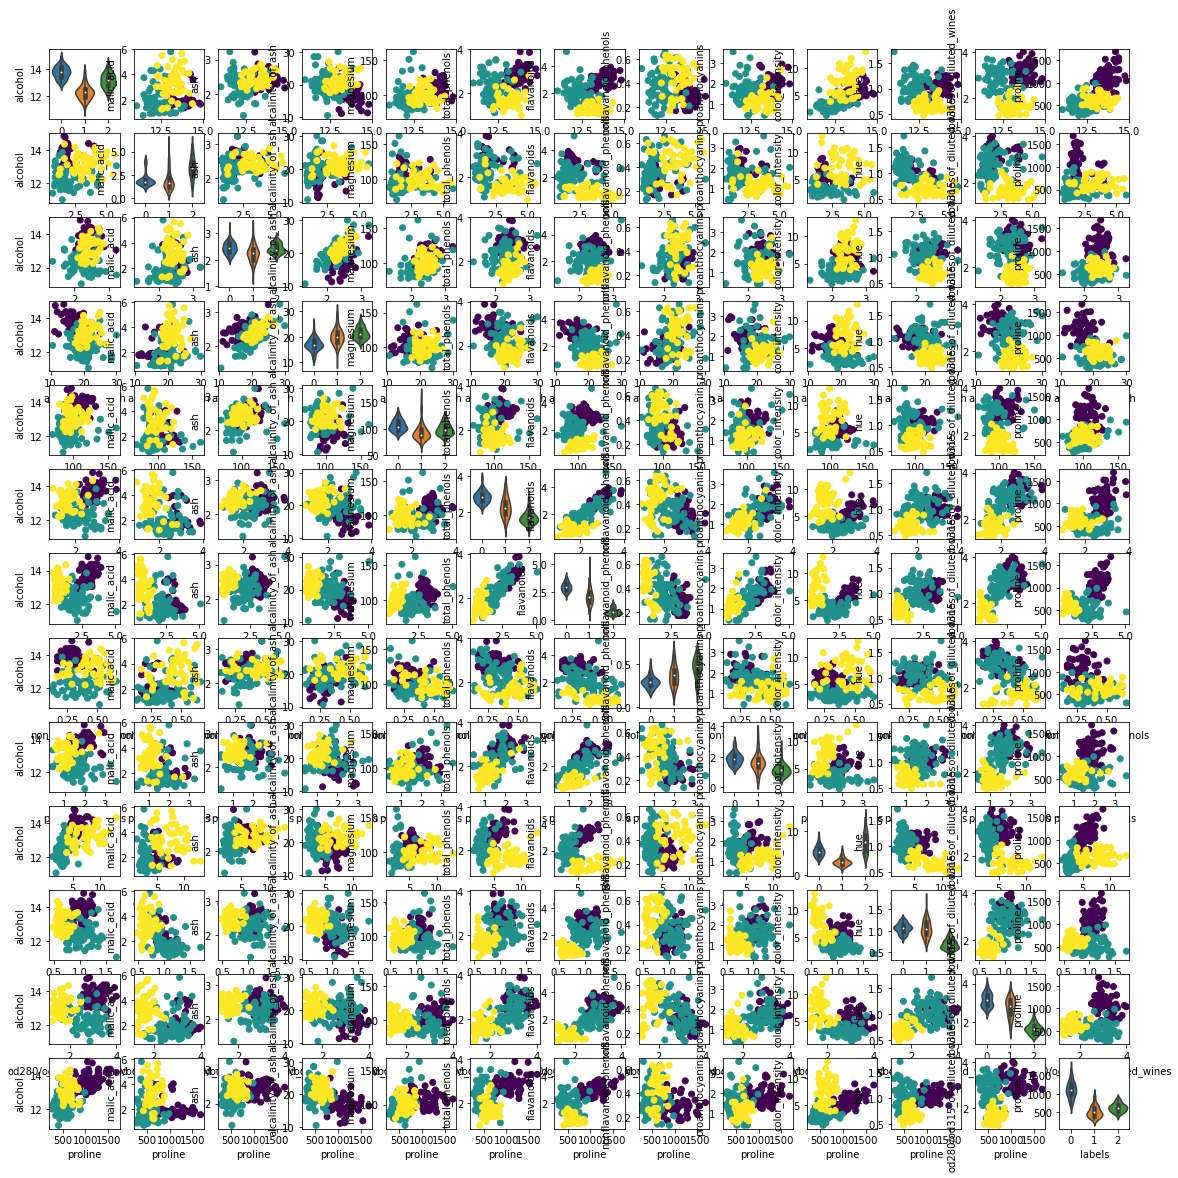

In [6]:
data = pd.DataFrame(iris.data)
feature_names = iris["feature_names"]
data.columns = feature_names
data["labels"] = iris.target

def custom_pairplot(data, feature_names, labels):
    plt.figure(figsize=(10, 10))
    plt.subplots_adjust(left = 0, right=1.5, bottom=0, top=1.5)
    n_features = len(feature_names)
    
    for i in range(len(feature_names)):
        for j in range(len(feature_names)):
            plt.subplot(n_features, n_features, i*n_features+j+1)
            if i==j:
                sns.violinplot(data=data, x=labels, y=feature_names[i])
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], c=data[labels])
                plt.xlabel(feature_names[i])
                plt.ylabel(feature_names[j])
                
custom_pairplot(data, feature_names=feature_names, labels="labels")                



We currently use four different features to classify the flowers. What happens if we use less than four features? How can we mathematically determine the features that are the least relevant ones for the classification of the flowers?<br>  
This is where the SVD comes in. In the next step you should compute the SVD of the matrix $A \in \mathbb{R}^{150\times 4}$ that contains the data of the iris dataset. Visualize the singular values of the matrix A.

[1.08866699e+04 4.93562048e+02 5.71488432e+01 3.01001254e+01
 1.85428156e+01 1.44630205e+01 1.10360376e+01 5.28989024e+00
 4.45658827e+00 3.57527145e+00 2.60122174e+00 1.98680818e+00
 1.21391398e+00]


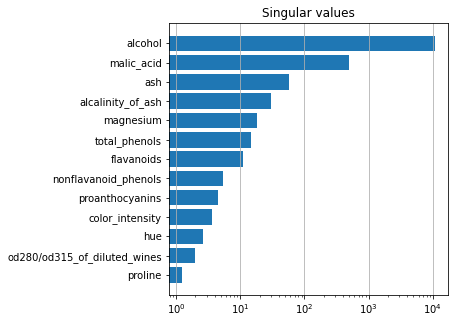

In [16]:
k = 2

A = data[feature_names].values

U, S, Vt = svd(A)
U_trunc, S_trunc, Vt_trunc = truncate(U, S, Vt, k)

trunc_A = U_trunc @ np.diag(S_trunc)
reduced_data = pd.DataFrame(trunc_A)
plt.figure(figsize=(5, 5))
plt.barh(feature_names[::-1], S[::-1])
plt.title(f"Singular values")
plt.gca().xaxis.grid(True)
plt.xscale('log')
print(S)
#Semilogarithmisch?

What features are the most important features when we want to classify the flowers?

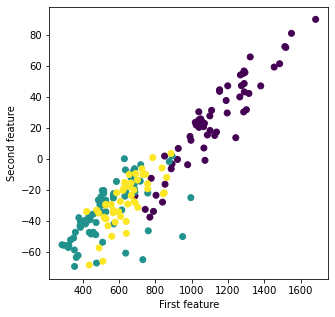

In [13]:
plt.figure(figsize=(5, 5))
plt.scatter(reduced_data[0], reduced_data[1], c = iris.target)
plt.xlabel("First feature")
plt.ylabel("Second feature");